In [40]:
import pandas as pd
import numpy as np

In [41]:
from google.colab import drive
drive.mount('DATA')

Drive already mounted at DATA; to attempt to forcibly remount, call drive.mount("DATA", force_remount=True).


In [ ]:
path = '/content/DATA/MyDrive/QEnergy/Results/XGBoost/XGBoost OFFER SP PAVG. PRICE MODEL OPT. - SP (scores MAPE).csv'
# path = '/content/DATA/MyDrive/QEnergy/Results/XGBoost/XGBoost BID SP PAVG. PRICE MODEL OPT. - SP (scores MAPE).csv'
path_bo = '/content/DATA/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP).csv'

In [ ]:
mape_bid = pd.read_csv(path)

In [ ]:
df = pd.read_csv(path_bo)

In [ ]:
df.head()

,recordtype,settlementDate,settlementPeriod,BMU ID,acceptedprice,acceptedvolume,BMU Type,BMU Fuel Type,BMU GSP Group Name,LOC LAT,...,sp45_totalvolume,sp46_pavgprice,sp46_meanvolume,sp46_totalvolume,sp47_pavgprice,sp47_meanvolume,sp47_totalvolume,sp48_pavgprice,sp48_meanvolume,sp48_totalvolume
0,BID,2021-01-01,1,E_GYAR-1,37.0,-18.366,E,CCGT,Eastern England,52.583834,...,0.000,7.379666,0.0000,0.000,8.159455,0.000,0.000,7.616887,0.000,0.000
1,BID,2021-01-01,1,E_SHOS-1,35.0,-0.666,E,CCGT,South Eastern England,50.829511,...,-181.027,35.944820,-16.8968,-84.484,8.159455,0.000,0.000,36.221377,-6.563,-26.252
2,BID,2021-01-01,1,T_CDCL-1,40.0,-11.084,T,CCGT,East Midlands,53.307421,...,0.000,20.000000,0.0000,0.000,8.159455,0.000,0.000,36.221377,0.000,0.000
3,BID,2021-01-01,1,T_MRWD-1,37.1,-174.768,T,CCGT,Southern England,50.898831,...,-51.167,38.250000,-83.5000,-83.500,38.250000,-7.834,-7.834,38.210000,-18.844,-18.844
4,BID,2021-01-01,1,T_PEMB-11,37.0,-33.634,T,CCGT,Southern Wales,51.683003,...,0.000,35.944820,0.0000,0.000,8.159455,0.000,0.000,36.221377,0.000,0.000


In [ ]:
df[df['settlementDate']]

In [ ]:
mape_bid['test_day'].value_counts()

2023-06-01    9
2023-06-03    9
2023-06-05    9
2023-06-07    9
2023-06-09    9
2023-06-11    9
2023-06-13    9
2023-06-15    9
2023-06-17    9
2023-06-19    9
2023-06-21    9
2023-06-23    9
2023-06-25    9
2023-06-27    9
2023-06-29    9
Name: test_day, dtype: int64

In [ ]:
mape_bid['mae_test'].max(), mape_bid['mae_test'].min()

(62.55225803594341, 0.7257843017578125)

In [ ]:
mape_bid['meanreal_test'].max(), mape_bid['meanreal_test'].min()

(170.0, 80.5)

In [ ]:
mape_bid[mape_bid['meanreal_test']==0]

,test_day,test_sp,size_train,rmse_train,mae_train,meanreal_train,meanpred_train,resid_train,absresidmean_train,residmean_train,stdresid_train,size_test,rmse_test,mae_test,meanreal_test,meanpred_test,resid_test,absresidmean_test,residmean_test,stdresid_test


In [ ]:
mape_bid['MAPE'] = (mape_bid['mae_test']/(mape_bid['meanreal_test']))*100

In [ ]:
mape_bid[mape_bid['MAPE']<-13000]

,test_day,test_sp,size_train,rmse_train,mae_train,meanreal_train,meanpred_train,resid_train,absresidmean_train,residmean_train,...,size_test,rmse_test,mae_test,meanreal_test,meanpred_test,resid_test,absresidmean_test,residmean_test,stdresid_test,MAPE
113,2023-06-25,31,235991,74.601664,26.849849,72.629201,72.629201,1.403712,26.849849,0.000006,...,2,39.410816,37.530294,-0.283554,-37.813847,75.060588,37.530294,37.530294,6.014345,-13235.700069


In [ ]:
mape_bid.iloc[113]

test_day                2023-06-25
test_sp                         31
size_train                  235991
rmse_train               74.601664
mae_train                26.849849
meanreal_train           72.629201
meanpred_train           72.629201
resid_train               1.403712
absresidmean_train       26.849849
residmean_train           0.000006
stdresid_train            0.000316
size_test                        2
rmse_test                39.410816
mae_test                 37.530294
meanreal_test            -0.283554
meanpred_test           -37.813847
resid_test               75.060588
absresidmean_test        37.530294
residmean_test           37.530294
stdresid_test             6.014345
MAPE                 -13235.700069
Name: 113, dtype: object

In [ ]:
graph = mape_bid[['test_day', 'test_sp', 'MAPE']]

In [ ]:
graph.drop(113, inplace=True)

<ipython-input-13-d8674e5e1d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph.drop(113, inplace=True)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
graph['day_sp'] = graph['test_day'].astype(str) + '_' + graph['test_sp'].astype(str)

<ipython-input-27-4d649aacae48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['day_sp'] = graph['test_day'].astype(str) + '_' + graph['test_sp'].astype(str)


In [42]:
# Asumiendo que 'test_day' es de tipo datetime o es una cadena en el formato 'AAAA-MM-DD'
graph['day'] = graph['test_day'].str[-2:]  # extraer el día de la fecha

# Convertir el settlement period a string y agregarlo al formato deseado
graph['day_sp'] = 'Day:' + graph['day'] + '_SP:' + graph['test_sp'].astype(str)

<ipython-input-42-27338cd2e6a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['day'] = graph['test_day'].str[-2:]  # extraer el día de la fecha
<ipython-input-42-27338cd2e6a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['day_sp'] = 'Day:' + graph['day'] + '_SP:' + graph['test_sp'].astype(str)


In [43]:
graph['day_sp']

0       Day:01_SP:4
1      Day:01_SP:10
2      Day:01_SP:16
3      Day:01_SP:22
4      Day:01_SP:25
           ...     
130    Day:29_SP:25
131    Day:29_SP:31
132    Day:29_SP:37
133    Day:29_SP:40
134    Day:29_SP:48
Name: day_sp, Length: 135, dtype: object

<ipython-input-46-0ec0617d66e9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


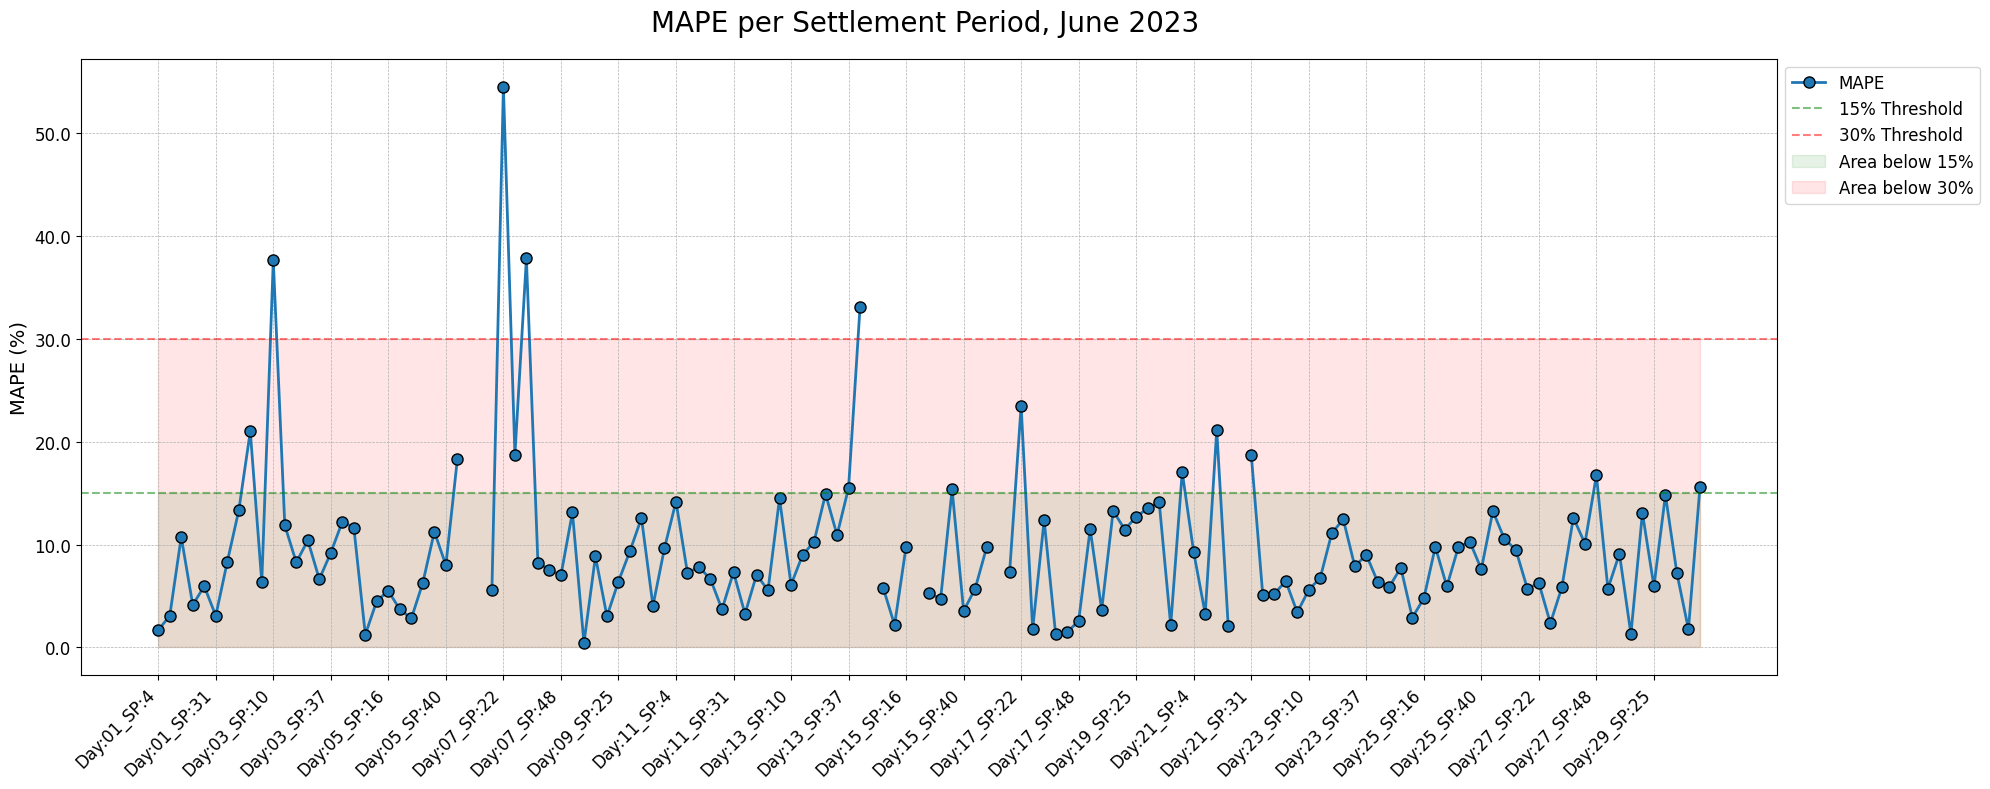

In [46]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data with enhanced styling
ax.plot(graph['day_sp'], graph['MAPE'], marker='o', markersize=8, markeredgecolor='black', linewidth=2, label='MAPE')

# Style the x-axis
xticks_loc = ax.get_xticks()
ax.set_xticks(xticks_loc[::5])  # Only show every 5th tick
ax.set_xticklabels(graph['day_sp'][::5], rotation=45, ha="right", fontsize=12)

# Style the y-axis
ax.set_ylabel('MAPE (%)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot horizontal lines and fill areas below them with labels for the legend
ax.axhline(y=15, color='green', linestyle='--', alpha=0.5, linewidth=1.5, label='15% Threshold')
ax.axhline(y=30, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='30% Threshold')
ax.fill_between(graph['day_sp'], 0, 15, color='green', alpha=0.1, label='Area below 15%')
ax.fill_between(graph['day_sp'], 0, 30, color='red', alpha=0.1, label='Area below 30%')

# Legend and Title with enhanced styling
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
ax.set_title('MAPE per Settlement Period, June 2023 ', fontsize=20, pad=20)

# Tight layout to accommodate the legend
plt.tight_layout()

# Display the graph
plt.show()

In [ ]:
graph['test_day'] = pd.to_datetime(graph['test_day'])

<ipython-input-97-99e58ce0c4d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['test_day'] = pd.to_datetime(graph['test_day'])


In [ ]:
graph.reset_index(drop=True)

,test_day,test_sp,MAPE,day_sp
0,2023-06-01,4,26.387358,2023-06-01_4
1,2023-06-01,10,70.857090,2023-06-01_10
2,2023-06-01,16,43.491937,2023-06-01_16
3,2023-06-01,22,28.336218,2023-06-01_22
4,2023-06-01,25,35.270305,2023-06-01_25
...,...,...,...,...
129,2023-06-29,25,13.750579,2023-06-29_25
130,2023-06-29,31,36.951468,2023-06-29_31
131,2023-06-29,37,27.929674,2023-06-29_37
132,2023-06-29,40,26.607663,2023-06-29_40


In [ ]:
subset = graph[(graph['test_day']>pd.to_datetime('2023-06-15'))&(graph['test_day']<pd.to_datetime('2023-06-21'))]

,test_day,test_sp,MAPE,day_sp
72,2023-06-17,4,11.715856,2023-06-17_4
73,2023-06-17,10,16.888821,2023-06-17_10
74,2023-06-17,16,22.174585,2023-06-17_16
75,2023-06-17,22,27.070747,2023-06-17_22
76,2023-06-17,25,28.274565,2023-06-17_25
77,2023-06-17,31,16.355554,2023-06-17_31
78,2023-06-17,37,13.610366,2023-06-17_37
79,2023-06-17,40,12.199220,2023-06-17_40
80,2023-06-17,48,6.662464,2023-06-17_48
81,2023-06-19,4,6.099544,2023-06-19_4


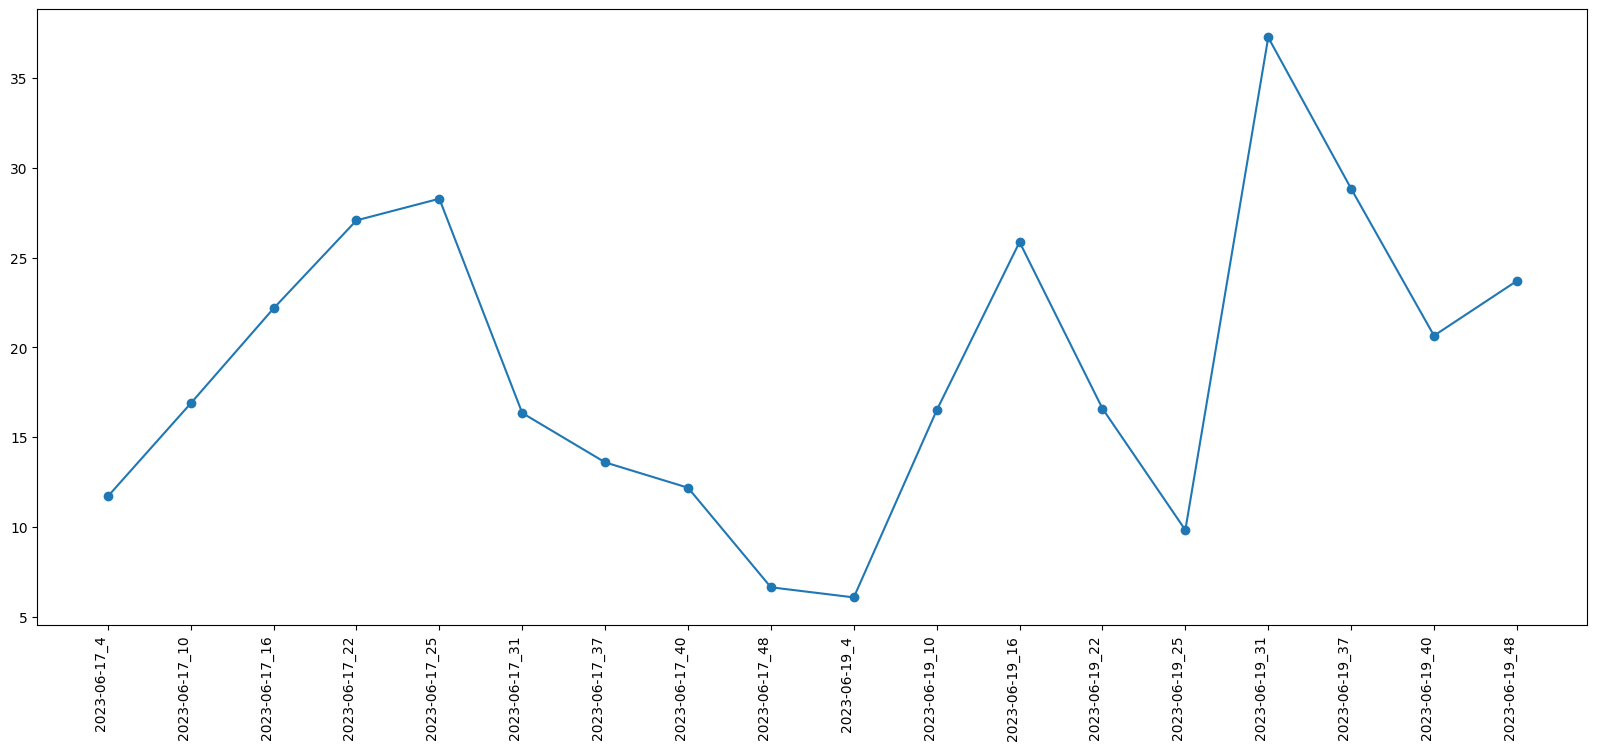

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(subset['day_sp'], subset['MAPE'], marker='o')
plt.xticks(rotation=90, ha="right")
plt.show()